29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 181s 382ms/step - loss: 0.3790 - val_loss: 0.2880
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 383ms/step - loss: 0.2848 - val_loss: 0.2812
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 385ms/step - loss: 0.2792 - val_loss: 0.2778
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 180s 384ms/step - loss: 0.2752 - val_loss: 0.2753
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 382ms/step - loss: 0.2734 - val_loss: 0.2739
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 208s 394ms/step - loss: 0.2717 - val_loss: 0.2731
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 178s 379ms/step - loss: 0.2700 - val_loss: 0.2725
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 205s 385ms/step - loss: 0.2693 - val_loss: 0.2704
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 181s 386ms/step - loss: 0.2680 - val_loss: 0.2732
Ep

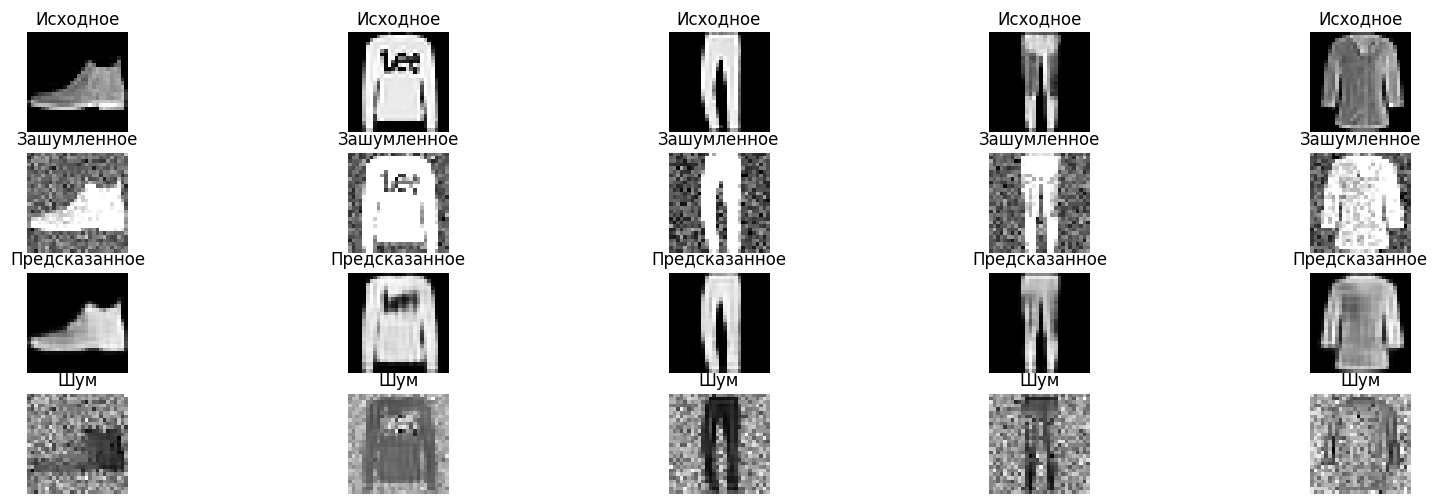

In [ ]:
# Установка необходимых библиотек
!pip install numpy matplotlib keras

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.utils import to_categorical

# Загрузка данных
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Нормализация данных
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Добавление размерности канала
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Генерация шума
train_noise = np.random.normal(loc=0.5, scale=0.1, size=x_train.shape)
test_noise = np.random.normal(loc=0.5, scale=0.1, size=x_test.shape)

# Создание зашумленных изображений
x_train_noisy = np.clip(x_train + train_noise, 0., 1.)
x_test_noisy = np.clip(x_test + test_noise, 0., 1.)

# Входной слой
input_img = Input(shape=(28, 28, 1))

# Энкодер
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Декодер
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Модель автокодировщика
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Обучение модели
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Предсказание на тестовой выборке
decoded_imgs = autoencoder.predict(x_test_noisy)

# Вывод результатов
n = 5
plt.figure(figsize=(20, 6))
for i in range(n):
    # Исходное изображение
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Исходное")
    plt.axis('off')

    # Зашумленное изображение
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Зашумленное")
    plt.axis('off')

    # Предсказанное изображение
    ax = plt.subplot(4, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Предсказанное")
    plt.axis('off')

    # Изображение шума
    ax = plt.subplot(4, n, i + 1 + 3*n)
    plt.imshow((x_test_noisy[i] - decoded_imgs[i]).reshape(28, 28), cmap='gray')
    plt.title("Шум")
    plt.axis('off')

plt.show()